In [100]:
#Data Cleaning 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [101]:
import matplotlib.style as style
style.use("fivethirtyeight")

# Purpose of this notebook

This notebook will mainly deal with cleaning the L&T vehicle loan default dataset. 

In [102]:
#Import the dataset
df = pd.read_csv('train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [103]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

Can immediately see that there are some variables which will not be of use to us so will drop them from the dataset. These are UniqueID, branch_id, supplier_id, current_pincode_ID, state_ID,employee_code_ID, MobileNO_Avl_Flag.

Date of birth will be dropped because despite the fact that it may be increase the performance of the model there are certain laws, such as the Equal Credit Opportunity Act in the US, that prohibit discrimination in lending based on age, race, etc...

In [104]:
df = df.drop(["UniqueID","branch_id","supplier_id","Current_pincode_ID","State_ID","Employee_code_ID",
              "MobileNo_Avl_Flag","Date.of.Birth"],axis=1)
df.head()

,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,45,Salaried,03-08-18,1,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,47145,65550,73.23,45,Self employed,26-09-18,1,0,0,0,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,53278,61360,89.63,45,Self employed,01-08-18,1,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,57513,66113,88.48,45,Self employed,26-10-18,1,0,0,0,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,52378,60300,88.39,45,Self employed,26-09-18,1,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [105]:
df.shape

(233154, 33)

In [106]:
#The first thing we will look at is the amount of null or missing values in the data
df.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
manufacturer_id                           0
Employment.Type                        7661
DisbursalDate                             0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT                     0
PRI.DISBURSED.AMOUNT                      0
SEC.NO.OF.ACCTS                           0
SEC.ACTIVE.ACCTS                          0
SEC.OVERDUE.ACCTS                         0
SEC.CURRENT.BALANCE             

In [107]:
# As can be seen above only 1 column contains missing values. Due to the fact that we have over 
# 200,000 records, we will simply drop the missing values as it does not lead to a significant loss of
# infomation. 
df.dropna(inplace=True)
df.isnull().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
manufacturer_id                        0
Employment.Type                        0
DisbursalDate                          0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCTS                      0
SEC.CURRENT.BALANCE                    0
SEC.SANCTIONED.AMOUNT                  0
SEC.DISBURSED.AM

In [108]:
print(df.duplicated().sum()) # There were 2 duplicated rows in the dataset.
df.drop_duplicates(inplace=True)

447


Now that all missing and duplicate values have been dealt with , it is time to go more in depth with 
the data cleaning. The numerical features will be examined for any outliers and the categorical features will be converted to numerical ones (one hot encoding).

## Numerical Features

In [109]:
df.dtypes

disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
manufacturer_id                          int64
Employment.Type                         object
DisbursalDate                           object
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONED.AMOUNT                    int64
PRI.DISBURSED.AMOUNT                     int64
SEC.NO.OF.ACCTS                          int64
SEC.ACTIVE.ACCTS                         int64
SEC.OVERDUE.A

First I will have a look at the target variable. 

Can see after inspecting the target variable that the dataset is imbalanced. Most of the cases do not result in default. Therefore, we will try some algorithms out on the orginal dataset (without any balancing methods), on a downsampled dataset and a upsampled dataset.

No handles with labels found to put in legend.


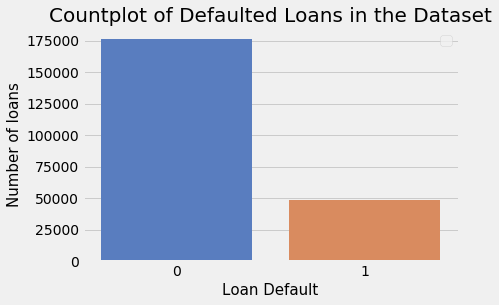

In [110]:
sns.countplot(df["loan_default"],palette="muted")
plt.title("Countplot of Defaulted Loans in the Dataset",fontsize=20)
plt.xlabel("Loan Default",fontsize=15)
plt.ylabel("Number of loans",fontsize=15)
plt.legend(loc="best")

In [111]:
#Will examine all of the numerical features to check for any outliers. Will also look at the distribution 
#of the features. 
numerical = df.select_dtypes(include=["int64","float64"])
numerical.head()

,disbursed_amount,asset_cost,ltv,manufacturer_id,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,45,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,45,1,0,0,0,0,598,...,0,0,0,0,1991,0,0,1,0,1
2,53278,61360,89.63,45,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,45,1,0,0,0,0,305,...,0,0,0,0,31,0,0,0,1,1
4,52378,60300,88.39,45,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [112]:
numerical.describe()

,disbursed_amount,asset_cost,ltv,manufacturer_id,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,225046.000000,2.250460e+05,225046.000000,225046.000000,225046.000000,225046.000000,225046.000000,225046.000000,225046.000000,225046.000000,...,225046.000000,2.250460e+05,2.250460e+05,2.250460e+05,2.250460e+05,2.250460e+05,225046.000000,225046.000000,225046.000000,225046.000000
mean,54245.603148,7.564580e+04,74.798614,69.091461,0.837664,0.077380,0.147152,0.023733,0.002142,293.622428,...,0.007376,5.580745e+03,7.504062e+03,7.385745e+03,1.301826e+04,3.263314e+02,0.387365,0.098904,0.209251,0.217022
std,12782.190100,1.853718e+04,11.447729,22.166647,0.368759,0.267194,0.354258,0.152216,0.046230,338.959219,...,0.112412,1.730996e+05,1.862276e+05,1.856541e+05,1.498559e+05,1.577180e+04,0.960465,0.386735,0.710726,0.412219
min,13320.000000,3.700000e+04,13.500000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,47049.000000,6.563400e+04,68.940000,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,53703.000000,7.082150e+04,76.880000,86.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,60213.000000,7.898700e+04,83.730000,86.000000,1.000000,0.000000,0.000000,0.000000,0.000000,680.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.058000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,987354.000000,1.328954e+06,95.000000,156.000000,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


Text(0.5, 0, 'Asset Cost')

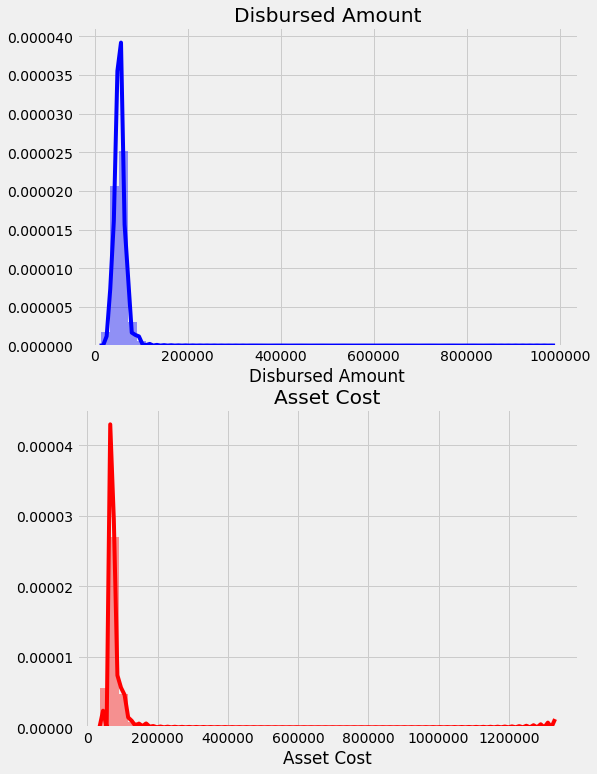

In [113]:
f, axes = plt.subplots(2,1,figsize=(8,12))
sns.distplot(numerical["disbursed_amount"],hist=True,color='b',ax = axes[0])
sns.distplot(numerical["asset_cost"],hist=True,color="r",ax = axes[1])
#sns.distplot(numerical["NEW.ACCTS.IN.LAST.SIX.MONTHS"],hist=True,color="g",ax=axes[1,0])
#sns.distplot(numerical["NO.OF_INQUIRIES"],hist=True,color="y",ax=axes[1,1])

axes[0].title.set_text("Disbursed Amount")
axes[0].set_xlabel("Disbursed Amount")
axes[1].title.set_text("Asset Cost")
axes[1].set_xlabel("Asset Cost")
#axes[1,0].title.set_text("New accounts in last 6 months")
#axes[1,0].set_xlabel("New accounts in last 6 months")
#axes[1,1].title.set_text("Number of inquiries")
#axes[1,1].set_xlabel("Number of inquiries")

Text(0.5, 0, 'Number of inquiries')

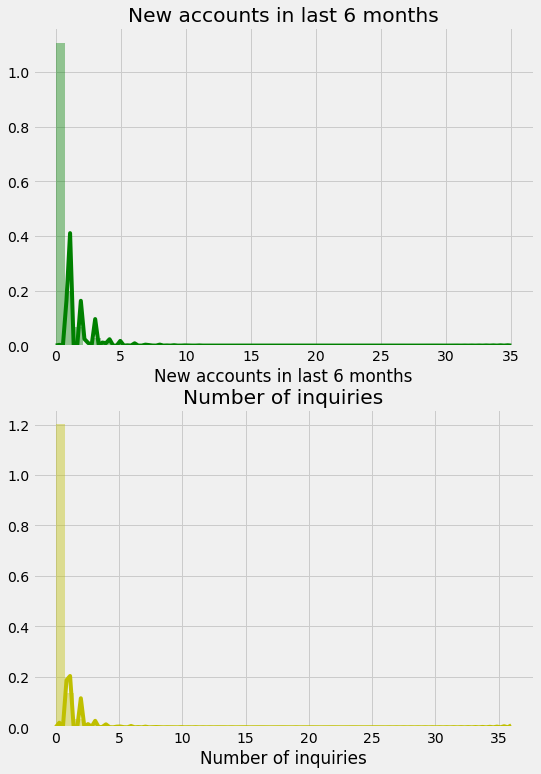

In [114]:
f, axes = plt.subplots(2,1,figsize=(8,12))

sns.distplot(numerical["NEW.ACCTS.IN.LAST.SIX.MONTHS"],hist=True,color="g",ax=axes[0])
sns.distplot(numerical["NO.OF_INQUIRIES"],hist=True,color="y",ax=axes[1])

axes[0].title.set_text("New accounts in last 6 months")
axes[0].set_xlabel("New accounts in last 6 months")
axes[1].title.set_text("Number of inquiries")
axes[1].set_xlabel("Number of inquiries")

Can see the that both disbursed amount and asset cost are extremely positively skewed due to the presence of outliers. We will try and look at all values that are in the 95th percentile. This is referred to as capping. The decision to look at the 95th percentile is completely arbitrary. The 90th percentile could also have been chosen also.

For new acounts in last six months and no. of inquiries although they are both extremely positvely skewed it might not be the best idea to eliminate all the information. Most people have not taken out new loans in the last 6 months but those that do may be at higher risk of default. The same logic also applies for the no. of inquiries variable. 

In [115]:
print(numerical["disbursed_amount"].quantile(q=0.95))
print(numerical["asset_cost"].quantile(q=0.95))

73817.0
109068.0


In [116]:
df = df[(df["disbursed_amount"]<=68817)&(df["asset_cost"]<=109032)]

In [117]:
df.shape

(200539, 33)

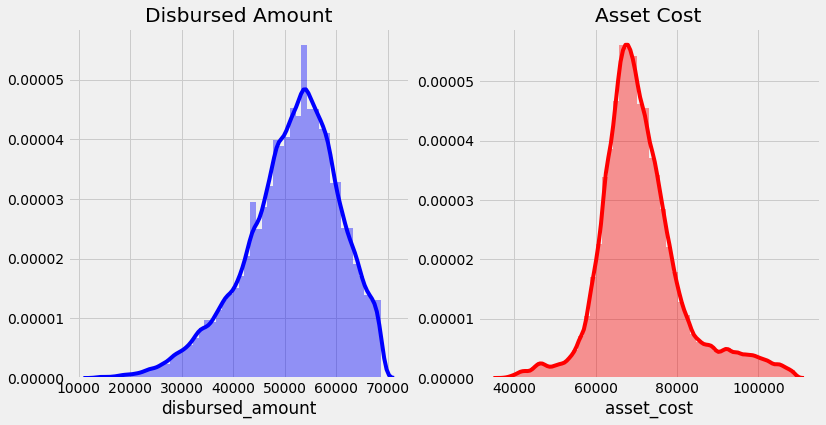

In [118]:
#sns.set_style("darkgrid") # Personal preference

f, axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(df["disbursed_amount"],hist=True,color='b',ax = axes[0])
sns.distplot(df["asset_cost"],hist=True,color="r",ax = axes[1])
axes[0].title.set_text("Disbursed Amount")
axes[1].title.set_text("Asset Cost")

## Primary and secondary accounts.

Primary accounts are those that the customer has taken out for his/her own use whereas secondary accounts are those in which the customer acts as a co-applicant or gurantor.

Exploring the accounts data can provide an indication into how it is structured and if there is any cleaning/transformation to be carried out. 

In [119]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'manufacturer_id',
       'Employment.Type', 'DisbursalDate', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [120]:
#Will get the columns that are regarding the primary and secondary accounts
cols = ['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT' ]
dfacc = df[cols]
dfacc.head()

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,31,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
dfacc.describe()

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT
count,200539.000000,200539.000000,200539.000000,2.005390e+05,2.005390e+05,2.005390e+05,200539.000000,200539.000000,200539.000000,2.005390e+05,2.005390e+05,2.005390e+05,2.005390e+05,2.005390e+05
mean,2.477463,1.052643,0.159331,1.674038e+05,2.215633e+05,2.210811e+05,0.063180,0.029595,0.007699,5.827857e+03,7.873201e+03,7.746403e+03,1.318961e+04,3.513704e+02
std,5.263168,1.951416,0.553075,9.444163e+05,2.523140e+06,2.526123e+06,0.658832,0.331408,0.115303,1.801123e+05,1.931824e+05,1.925652e+05,1.554578e+05,1.664496e+04
min,0.000000,0.000000,0.000000,-2.018309e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000,1.000000,0.000000,3.627900e+04,6.415050e+04,6.238950e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.087000e+03,0.000000e+00
max,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06


In [122]:
#IQR
Q1 = dfacc.quantile(q=0.25)
Q3 = dfacc.quantile(q=0.75)
IQR = Q3-Q1
print(IQR)

PRI.NO.OF.ACCTS              3.0
PRI.ACTIVE.ACCTS             1.0
PRI.OVERDUE.ACCTS            0.0
PRI.CURRENT.BALANCE      36279.0
PRI.SANCTIONED.AMOUNT    64150.5
PRI.DISBURSED.AMOUNT     62389.5
SEC.NO.OF.ACCTS              0.0
SEC.ACTIVE.ACCTS             0.0
SEC.OVERDUE.ACCTS            0.0
SEC.CURRENT.BALANCE          0.0
SEC.SANCTIONED.AMOUNT        0.0
SEC.DISBURSED.AMOUNT         0.0
PRIMARY.INSTAL.AMT        2087.0
SEC.INSTAL.AMT               0.0
dtype: float64


We can see from the descriptive statistics given above that there are some very strange values given. the max primary no. of accounts is 453 which could possibly be a data entry error. The primary number of active accounts is 144. 

Also, there are a lot of 0's in the dataset. This could possibly be due to the fact that a lot of individuals do not have any other loans active when the loan was disbursed. If someone did not have any other primary accounts open then the the disbursed amount could be zero for example. 

The highest values for both the primary instalment amount is very high. This could be due to a data collection error or to the fact that the EMI (equated monthly installments) amount of a loan(s) is extremely high. 

By looking at the IQR it can be seen that the four 'problematic' variables are PRI.CURRENT.BALANCE     
,PRI.SANCTIONED.AMOUNT, PRI.DISBURSED.AMOUNT and PRIMARY.INSTAL.AMT. The secondary account variables do not show any outliers based off of the IQR or descriptive statistics.

In [123]:
print(dfacc["PRI.CURRENT.BALANCE"].quantile(q=0.90))
print(dfacc["PRI.SANCTIONED.AMOUNT"].quantile(q=0.90))
print(dfacc["PRI.DISBURSED.AMOUNT"].quantile(q=0.90))
print(dfacc["PRIMARY.INSTAL.AMT"].quantile(q=0.90))

310153.4000000009
454039.00000000035
451664.0000000005
11638.0


In [124]:
#We have a lot of rows in our dataset so we can drop the above outliers from the data.

df = df[(df["PRI.CURRENT.BALANCE"]<=310153)&(dfacc["PRI.SANCTIONED.AMOUNT"]<=454039)&
       (df["PRI.DISBURSED.AMOUNT"]<=451664)&(dfacc["PRIMARY.INSTAL.AMT"]<=11638)]
df.shape

(169163, 33)

Text(0.5, 0, 'Primary account sanctioned amount')

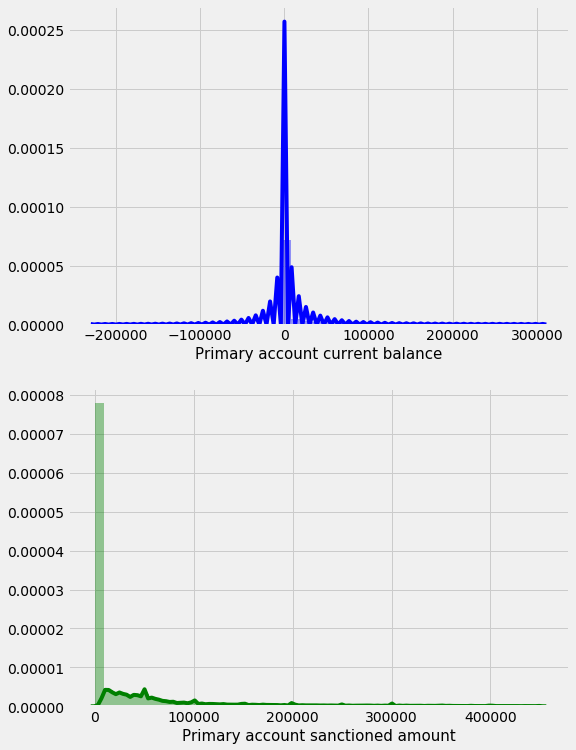

In [125]:
#Now we visualise just for inspection. 
f, axes = plt.subplots(2,1,figsize=(8,12))

sns.distplot(df["PRI.CURRENT.BALANCE"],hist=True,ax = axes[0],color="blue")
sns.distplot(df["PRI.SANCTIONED.AMOUNT"],hist=True,ax = axes[1],color="green")

axes[0].set_xlabel("Primary account current balance",fontsize=15)
axes[1].set_xlabel("Primary account sanctioned amount",fontsize=15)

Text(0.5, 0, 'Primary account instalment amount')

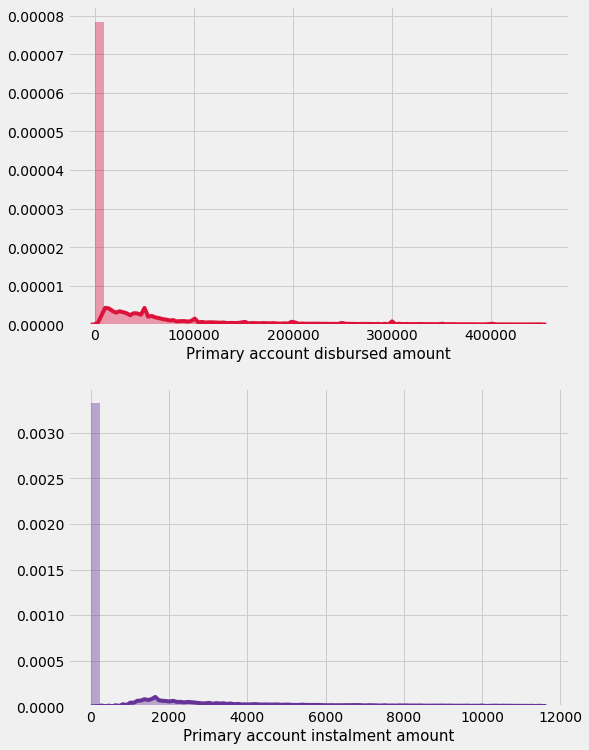

In [126]:
f, axes = plt.subplots(2,1,figsize=(8,12))

sns.distplot(df["PRI.DISBURSED.AMOUNT"],hist=True,ax = axes[0],color="crimson")
sns.distplot(df["PRIMARY.INSTAL.AMT"],hist=True,ax = axes[1],color="rebeccapurple")

axes[0].set_xlabel("Primary account disbursed amount",fontsize=15)
axes[1].set_xlabel("Primary account instalment amount",fontsize=15)

In [127]:
Q1 = df.quantile(q=0.25)
Q3 = df.quantile(q=0.75)
IQR = Q3-Q1
print(IQR)

disbursed_amount                       11829.00
asset_cost                             10634.00
ltv                                       14.78
manufacturer_id                           41.00
Aadhar_flag                                0.00
PAN_flag                                   0.00
VoterID_flag                               0.00
Driving_flag                               0.00
Passport_flag                              0.00
PERFORM_CNS.SCORE                        643.00
PRI.NO.OF.ACCTS                            2.00
PRI.ACTIVE.ACCTS                           1.00
PRI.OVERDUE.ACCTS                          0.00
PRI.CURRENT.BALANCE                     5247.50
PRI.SANCTIONED.AMOUNT                  20000.00
PRI.DISBURSED.AMOUNT                   19650.00
SEC.NO.OF.ACCTS                            0.00
SEC.ACTIVE.ACCTS                           0.00
SEC.OVERDUE.ACCTS                          0.00
SEC.CURRENT.BALANCE                        0.00
SEC.SANCTIONED.AMOUNT                   

We have managed to get rid of some of the outliers. Although the IQR for both Primary SANCTIONED AMOUNT  and PRIMARY DISBURSED AMOUNT remain high the data will be retained as we do not want too much information loss.

# Categorical Features

Now that all of the numerical features have been cleaned the categorical variables will be analysed. 

In [128]:
df.dtypes

disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
manufacturer_id                          int64
Employment.Type                         object
DisbursalDate                           object
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONED.AMOUNT                    int64
PRI.DISBURSED.AMOUNT                     int64
SEC.NO.OF.ACCTS                          int64
SEC.ACTIVE.ACCTS                         int64
SEC.OVERDUE.A

In [129]:
cat = df.select_dtypes(include="object")
cat.head()

,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,Salaried,03-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,Self employed,26-09-18,I-Medium Risk,1yrs 11mon,1yrs 11mon
2,Self employed,01-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,Self employed,26-10-18,L-Very High Risk,0yrs 8mon,1yrs 3mon
4,Self employed,26-09-18,No Bureau History Available,0yrs 0mon,0yrs 0mon


In [130]:
print(cat["Employment.Type"].value_counts())
print(cat["PERFORM_CNS.SCORE.DESCRIPTION"].value_counts())

Self employed    94578
Salaried         74585
Name: Employment.Type, dtype: int64
No Bureau History Available                                98833
C-Very Low Risk                                            11213
A-Very Low Risk                                            11132
D-Very Low Risk                                             6544
B-Very Low Risk                                             5623
M-Very High Risk                                            4626
F-Low Risk                                                  4269
H-Medium Risk                                               3767
K-High Risk                                                 3347
I-Medium Risk                                               3064
E-Low Risk                                                  2921
Not Scored: Sufficient History Not Available                2866
Not Scored: Not Enough Info available on the customer       2839
Not Scored: No Activity seen on the customer (Inactive)     2218
G-Low Ri

Will carry out a number of things. 

- Firstly, the employment type variable will be  one hot encoded. 

- The Cns.score_description variable could be grouped into 4 categories such as low risk, medium risk, high risk and not scored. However, it is essentially the description of the perform.cns.score variable so it will not be included in the final model to avoid multicollinearity.

- The average account age and credit history length will be converted to numerical values (months). 

In [131]:
df["Employment.Type"].replace({"Self employed":1,"Salaried":0},inplace=True)

In [132]:
#df["Employment.Type"].astype("str")
#df = pd.get_dummies(df,columns=["Employment.Type"])

In [133]:
#Now will deal with average account age and credit history length.
# Will need to remove the text 
#The .split() function can break up a string into a list. 
def length(x):
    yrs = int(x.split(" ")[0].replace("yrs","")) #Replace yrs with nothing. Essentially remove it.
    month = int(x.split(" ")[1].replace("mon","")) #Similar for months
    return yrs*12+month

In [134]:
#Apply the above created function to the two variables.
df["AVERAGE.ACCT.AGE"] = df["AVERAGE.ACCT.AGE"].apply(length)
df["CREDIT.HISTORY.LENGTH"] = df["CREDIT.HISTORY.LENGTH"].apply(length)

df.head() #Successfully converted to months.

,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,45,0,03-08-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,45,1,26-09-18,1,0,0,0,...,0,0,1991,0,0,1,23,23,0,1
2,53278,61360,89.63,45,1,01-08-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,45,1,26-10-18,1,0,0,0,...,0,0,31,0,0,0,8,15,1,1
4,52378,60300,88.39,45,1,26-09-18,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


Text(0, 0.5, 'No. of people')

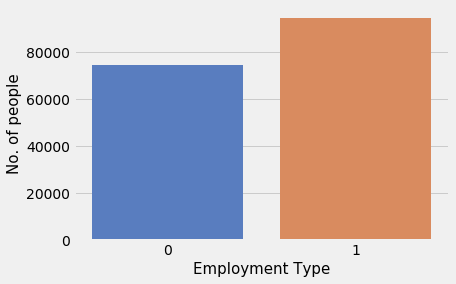

In [135]:
sns.countplot(df["Employment.Type"],palette ="muted")
plt.xlabel("Employment Type",fontsize=15)
plt.ylabel("No. of people",fontsize=15)

Text(0.5, 0, 'Credit History Length (Months)')

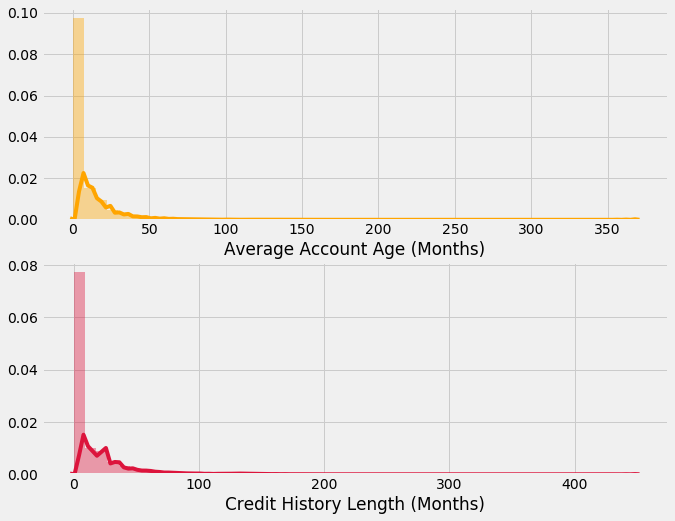

In [136]:
f, axes = plt.subplots(2,1,figsize=(10,8))
sns.distplot(df["AVERAGE.ACCT.AGE"],ax=axes[0],hist=True,color="orange")
sns.distplot(df["CREDIT.HISTORY.LENGTH"],ax=axes[1],hist=True,color="crimson")

axes[0].set_xlabel("Average Account Age (Months)")
axes[1].set_xlabel("Credit History Length (Months)")

In [137]:
df.drop(columns=["PERFORM_CNS.SCORE.DESCRIPTION","DisbursalDate"],inplace=True)

In [138]:
df.head()

,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,45,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,45,1,1,0,0,0,0,...,0,0,1991,0,0,1,23,23,0,1
2,53278,61360,89.63,45,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,45,1,1,0,0,0,0,...,0,0,31,0,0,0,8,15,1,1
4,52378,60300,88.39,45,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [139]:
df.shape

(169163, 31)

## Saving to a csv file. 

Now that all the cleaning has been completed the new cleaned dataframe will be converted to a csv file. This cleaned dataframe will form the basis for the future machine learning models.

In [140]:
df.to_csv("Cleaned_data.csv")